# Анализ рынка заведений общественного питания в Москве.

- Автор: Олеся Макарова

## Цели и задачи проекта

**Цель:** провести анализ рынка заведений общественного питания Москвы для выявления ключевых тенденций. 

**Задачи:**
1. Загрузить данные и познакомиться с их содержимым.
2. Провести предобработку данных.
3. Провести исследовательский анализ данных:
    - выявить категории заведений и посчитать количество заведений в разрезе этих категорий;
    - изучить распределение количества заведений по административным районам Москвы, и отдельно распределение заведений каждой категории в Центральном административном округе Москвы;
    - изучить соотношение сетевых и несетевых заведений в целом по всем данным и в разрезе категорий заведения;
    - исследовать количество посадочных мест в заведениях;
    - исследовать рейтинг заведений;
    - изучить, с какими данными показывают самую сильную корреляцию рейтинги заведений;
    - выявить топ-15 популярных сетей в Москве;
    - изучить вариацию среднего чека заведения (столбец middle_avg_bill) в зависимости от района Москвы.
4. Сформулировать выводы по проведённому анализу.



## Описание данных

Для анализа поступили данные о заведениях общественного питания Москвы, собранные на основе данных сервисов Яндекс Карты и Яндекс Бизнес на лето 2022 года. Информация в данных могла быть добавлена пользователями или найдена в общедоступных источниках, и носит исключительно справочный характер.

Данные состоят из двух датасетов:

- `/datasets/rest_info.csv` - содержит информацию о заведениях общественного питания
- `/datasets/rest_price.csv`-  cодержит информацию о среднем чеке в заведениях общественного питания:

**Описание датасета `/datasets/rest_info.csv`:**
- `name` — название заведения;  
- `address` — адрес заведения;  
- `district` — административный район, в котором находится заведение, например Центральный административный округ;  
- `category` — категория заведения, например «кафе», «пиццерия» или «кофейня»;  
- `hours` — информация о днях и часах работы;  
- `rating` — рейтинг заведения по оценкам пользователей в Яндекс Картах (высшая оценка — 5.0);  
- `chain` — число, выраженное 0 или 1, которое показывает, является ли заведение сетевым (для маленьких сетей могут встречаться ошибки):  
  - `0` — заведение не является сетевым;  
  - `1` — заведение является сетевым.  
- `seats` — количество посадочных мест.  

**Описание датасета `/datasets/rest_price.csv`:**

- `price` — категория цен в заведении, например «средние», «ниже среднего», «выше среднего» и так далее;  
- `avg_bill` — строка, которая хранит среднюю стоимость заказа в виде диапазона, например:  
  - «Средний счёт: 1000–1500 ₽»;  
  - «Цена чашки капучино: 130–220 ₽»;  
  - «Цена бокала пива: 400–600 ₽»;  
  - и так далее.  
- `middle_avg_bill` — число с оценкой среднего чека, которое указано только для значений из столбца `avg_bill`, начинающихся с подстроки «Средний счёт»:  
  - Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.  
  - Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.  
  - Если значения нет или оно не начинается с подстроки «Средний счёт», то в столбец ничего не войдёт.  
- `middle_coffee_cup` — число с оценкой одной чашки капучино, которое указано только для значений из столбца `avg_bill`, начинающихся с подстроки «Цена одной чашки капучино»:  
  - Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.  
  - Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.  
  - Если значения нет или оно не начинается с подстроки «Цена одной чашки капучино», то в столбец ничего не войдёт.  
  
  
  ## Структура проекта

1. Загрузка данных и знакомство с ними.
2. Предобработка данных.
3. Исследовательский анализ данных.
4. Итоговые выводы.

## 1. Загрузка данных и знакомство с ними

- **Загрузим необходимые библиотеки: pandas, numpy, matplotlib и seaborn, а также phik для построения матрицы корреляции.**

In [1]:
!pip install phik

In [2]:
!pip install jupyter-black

In [3]:
import jupyter_black

jupyter_black.load()

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

from matplotlib.colors import (
    LinearSegmentedColormap,
)

# Загружаем библиотеку для расчёта коэффициента корреляции phi_k
from phik import phik_matrix

warnings.filterwarnings("ignore")

**Загрузим датасеты:`/datasets/rest_info.csv` и `/datasets/rest_price.csv`. Данные датасетов сохраним в двух переменных: `info_df` и `price_df`.**

In [5]:
df_info = pd.read_csv("https://code.s3.yandex.net/datasets/rest_info.csv")
df_price = pd.read_csv("https://code.s3.yandex.net/datasets/rest_price.csv")

- **Познакомимся с данными датасета rest_info.csv  — выведем первые пять строк и общую информацию о датафрейме:**

In [6]:
df_info.head()

,id,name,category,address,district,hours,rating,chain,seats
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0


In [7]:
df_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        8406 non-null   object 
 1   name      8406 non-null   object 
 2   category  8406 non-null   object 
 3   address   8406 non-null   object 
 4   district  8406 non-null   object 
 5   hours     7870 non-null   object 
 6   rating    8406 non-null   float64
 7   chain     8406 non-null   int64  
 8   seats     4795 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 591.2+ KB


Датасет `rest_info.csv` содержит `9 столбцов и 8406 строк`, в которых представлена информация о заведениях общественного питания расположенных в различных районах города Москвы.

После первичного анализа данных можно сделать следующие выводы:
- Наименования столбцов находятся в нижнем регистре и удобны для анализа, поэтому менять их не требуется.
- Пропуски значений обнаружены в двух столбцах:`hours`, `seats`. Необходимо детально изучить эти пропуски и определить способы обработки.

- Типы данных в двух столбцах требуют корректировки. 
  - Столбец: `chain` (`int64` --> `bool`) указывает, является ли заведение сетевым (0 — нет, 1 — да). 
  - Столбец: `seats` (`float64` --> `int64 `) содержит данные о количестве мест, а это целые числа.

- Остальные столбцы имеют корректный тип данных:
  - Столбец: `id` содержит текстовые данные с уникальными идентификаторы заведений, представлен в `object`.
  - Столбец: `hours` содержит текстовую информацию и часы работы, представлен в `object`.
  - Столбцы: `name`, `category`, `address`, `district` содержат текстовый тип данных, представлены в представлен в `object`. 
  - Столбец `rating` содержит данные об оценках в виде дробных чисел, представлен в `float64`.

- Рекомендуется провести проверку на дубликаты, особенно в столбце id, так как он служит уникальным идентификатором заведений.


- **Познакомимся с данными датасета rest_price.csv  — выведем первые пять строк и общую информацию о датафрейме:**

In [8]:
df_price.head()

,id,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,045780ada3474c57a2112e505d74b633,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
1,1070b6b59144425896c65889347fcff6,средние,Средний счёт:от 1000 ₽,1000.0,NaN
2,03ac7cd772104f65b58b349dc59f03ee,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
3,a163aada139c4c7f87b0b1c0b466a50f,средние,Средний счёт:400–600 ₽,500.0,NaN
4,8a343546b24e4a499ad96eb7d0797a8a,средние,NaN,NaN,NaN


In [9]:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4058 entries, 0 to 4057
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4058 non-null   object 
 1   price              3315 non-null   object 
 2   avg_bill           3816 non-null   object 
 3   middle_avg_bill    3149 non-null   float64
 4   middle_coffee_cup  535 non-null    float64
dtypes: float64(2), object(3)
memory usage: 158.6+ KB


Датасет `rest_price.csv` содержит `5 столбцов и 4058 строк`, в которых представлена информация о категориях цен, среднем чеке и средней цене за чашку кофе в заведениях общественного питания города Москвы. 

После первичного анализа данных можно сделать следующие выводы:
- Наименования столбцов находятся в нижнем регистре в стиле snake case, и удобны для анализа, поэтому менять их не требуется.
- Обнаружены пропуски значений в четырех столбцах: `price`, `avg_bill`, `middle_avg_bill`, `middle_coffee_cup`. Необходимо детально изучить эти пропуски и определить способы обработки.  

- Типы данных во всех столбцах соответствуют содержимому но есть нюансы:
  - `id` содержит текстовые данные с уникальными идентификаторами заведений, представлен в `object`, что корректно.
  - `price` содержит категориальные данные, представлен в `object`, что корректно.
  - `avg_bill`  представлен как `object`, но содержит текстовые описания (например, "Средний счёт: 1500–1600 ₽") и ценовые диапазоны.
  - `middle_avg_bill` уже представляет средний чек в числовом формате (float64). Рекомендуется проверить, содержатся ли в `avg_bill` уникальные данные, которых нет в `middle_avg_bill`.
  - `middle_coffee_cup` — представлен в `float64`, но имеет много пропусков. Если эти пропуски нельзя заполнить корректными значениями, рекомендуется удалить столбец.

- Рекомендуется провести проверку на дубликаты, особенно в столбце id, так как он служит уникальным идентификатором заведений.

---

### Промежуточный вывод


Первичное знакомство с данными показывает наличие значительного количества пропусков, особенно в столбцах, связанных с ценами. Некоторые столбцы отнесены к некорректным типам данных - рекомендуется скорректироваь их в ходе предобработки. Чтобы принять решения о заполнении или удалении пропущенных значений, а также исключении дублирующих столбцов, рекомендуется объединить датасеты и провести предобработку данных.

### Объединение датасетов


- **Объединим датасеты `rest_info.csv` и `rest_price.csv` в один датафрейм:**

In [10]:
df = df_info.merge(df_price, on="id", how="left")

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int64  
 8   seats              4795 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: float64(4), int64(1), object(8)
memory usage: 919.4+ KB


## 2. Предобработка данных



### 2.1. Типы данных

- **Изучим типы данных и их корректность:**

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int64  
 8   seats              4795 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: float64(4), int64(1), object(8)
memory usage: 919.4+ KB


В датасете представлено четыре столбца с типом данных `float64`,  восемь столбцов с типом данных `object` и один столбец с типом данных `int64`, однако не для всех столбцов данные определены корректно. 

Рассмотрим более подробно:

- `id` - содержит текстовые данные с уникальными идентификаторы заведений, представлен в `object`, что корректно.
- `name`,`category`,`address`,`district` - содержат текстовый тип данных, представлены в `object`, что корректно.
- `hours` - в столбце содержится текст в виде дней недели и часы работы, представлен в `object`, оставим без изменений
- `rating` - содержит данные об оценках, представлен в`float64`, что корректно.
- `chain ` - имеет тип данных `int64`. Этот столбец указывает, является ли заведение сетевым (0 — нет, 1 — да). <mark>Рекомендуется изменить тип данных на `bool`</mark>.
- `seats` - имеет тип данных `float64`. Столбец содержит данные о количестве мест, а это целые числа. <mark>Рекомендуется изменить тип данных на  `int64 `</mark>.
- `price` - содержит категориальные данные, представлен в `object`, что корректно.
- `avg_bill` - представлен как `object`, но содержит текстовые описания и ценовые диапазоны. Оставим без изменений.
- `middle_avg_bill` - содержит числовые данные о среднем чеке, представлен в `float64`, что корректно.
- `middle_coffee_cup` - содержит числовые данные о средне цене чашки кофе, представлен в `float64`, что корректно.


- **Заменим тип данны в столбце `chain` с `int64` на `bool`:**

In [12]:
df["chain"] = df["chain"].astype("bool")

- **Заменим тип данных в столбце `seats` c `float64` на `int64`:**

In [13]:
df["seats"] = pd.to_numeric(df["seats"], errors="coerce")

df["seats"] = df["seats"].astype("Int64")

### 2.2. Обработка пропусков в данных

- **Найдем пропущенные значения и посчитаем долю пропусков в каждой колонке от общего количества:**

In [14]:
df.isna().sum().sort_values(ascending=False)

middle_coffee_cup    7871
middle_avg_bill      5257
price                5091
avg_bill             4590
seats                3611
hours                 536
id                      0
name                    0
category                0
address                 0
district                0
rating                  0
chain                   0
dtype: int64

In [15]:
round(df.isna().mean() * 100, 2).sort_values(ascending=False)

middle_coffee_cup    93.64
middle_avg_bill      62.54
price                60.56
avg_bill             54.60
seats                42.96
hours                 6.38
id                    0.00
name                  0.00
category              0.00
address               0.00
district              0.00
rating                0.00
chain                 0.00
dtype: float64

- **Проверим уникальные значения во всех столбцах датафрейма**

In [16]:
for column in [
    "id",
    "name",
    "category",
    "address",
    "district",
    "hours",
    "rating",
    "chain",
    "seats",
    "price",
    "avg_bill",
    "middle_avg_bill",
    "middle_coffee_cup",
]:
    print(f"Уникальные значения в столбце {column}:")
    print(df[column].sort_values().unique())
    print()

Уникальные значения в столбце id:
['0009f005d6fb47c6b067db5084f4e05a' '000c4f8e2c6b4a8e81127ed094688658'
 '0028eb1543284e18a0acdb0343a66107' ... 'ffda7a385ab34248ba4fddfcb653dbac'
 'ffe1ca40df284b4094b6cf051b45e4ac' 'fffda460734f4981bd2e50c5d766e469']

Уникальные значения в столбце name:
['#КешбэкКафе' '+39 Pizzeria Mozzarella bar' '1 Этаж' ... 'Ясно' 'Яуза'
 'ночной Баку']

Уникальные значения в столбце category:
['бар,паб' 'булочная' 'быстрое питание' 'кафе' 'кофейня' 'пиццерия'
 'ресторан' 'столовая']

Уникальные значения в столбце address:
['Москва, 1-й Автозаводский проезд, 5'
 'Москва, 1-й Балтийский переулок, 3/25'
 'Москва, 1-й Варшавский проезд, 1Ас9' ...
 'Москва, шоссе Энтузиастов, 86А, корп. 3' 'Москва, шоссе Энтузиастов, с2'
 'Москва, № 7']

Уникальные значения в столбце district:
['Восточный административный округ' 'Западный административный округ'
 'Северный административный округ'
 'Северо-Восточный административный округ'
 'Северо-Западный административный округ'
 'Цен

**В данных обнаружены пропуски в шести столбцах:**
  - `middle_coffee_cup`:  в 7841 строках (93.64%) отсутствует информация о средней цене чашки кофе. Предположительно цена чашки кофе указана только для кофеен. 
  
  - `seats`: в 3611 строках (42.96%) отсутствует информация о количестве посадочных мест.  Так как замена на среднее или другие значения будет некорректной (кол-во мест варьируется).  
  
  - `middle_avg_bill`: в 5257 строках (62.54%) отсутствует информация о среднем чеке. Вероятно это связано с тем, что для этой категории вместо среднего чека указывается средняя цена чашки кофе в столбце middle_coffee_cup.    
  
  - `price`: в 5091 строках (60.56%) отсутствует информация. 
  
  - `avg_bill`: в 4590 строках (54.60%) отсутствует информация о среднем чеке. 
  
  - `hours`: в 536 строках (6.38%) отсутствует информация о часах работы.
  
В нескольких столбцах датасета имеется большое количество пропусков, оставим их, чтобы не искажать данные.

### 2.3. Явные и неявные дубликаты в данных

- **Приведем наименования заведений `name` к единому регистру:**

In [17]:
df["name"] = df["name"].str.upper().str.strip()

print(df["name"].nunique())

5512


- **Проверим данные на наличие явных дубликатов.**

In [18]:
df.duplicated().sum()

0

В датафрейме нет полных дубликатов строк. 

- **Проверим данные на наличие неявных дубликатов:**

In [19]:
df.duplicated(subset="id").sum()

0

Каждая строка соответствует уникальному идентификатору заведения

In [20]:
df.duplicated(
    subset=["name", "category", "address", "district", "hours", "price", "avg_bill"]
).sum()

0

В датафрейме нет повторяющихся заведений с одинаковыми характеристиками.

- **Создадим столбец `is_24_7`  с обозначением того, что заведение работает ежедневно и круглосуточно (24/7):**

In [21]:
df["is_24_7"] = df["hours"].str.contains("ежедневно, круглосуточно", case=False)

df["is_24_7"].value_counts()

False    7140
True      730
Name: is_24_7, dtype: int64

In [22]:
df.columns

Index(['id', 'name', 'category', 'address', 'district', 'hours', 'rating',
       'chain', 'seats', 'price', 'avg_bill', 'middle_avg_bill',
       'middle_coffee_cup', 'is_24_7'],
      dtype='object')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   bool   
 8   seats              4795 non-null   Int64  
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
 13  is_24_7            7870 non-null   object 
dtypes: Int64(1), bool(1), float64(3), object(9)
memory usage: 935.8+ KB


---

### Промежуточный вывод


**В результате предобработки данных были выполнены следующие действия**:

- Датасеты `rest_info.csv` и `rest_price.csv` объединены в один датафрейм;
- В столбце `chain` заменен тип данных с `int64` на `bool`;
- В столбце `seats` заменен тип данных с `float64` на `int64`;
- В столбце `name` наименования заведений превелены к верхнему регистру;
- Данные в датасете проверены на дубликаты - дубликаты не обнаружены;
- Создан столбец `is_24_7` с обозначением того, работает ли заведение ежедневно и круглосуточно, то есть 24/7.

По итогам предобработки датафрейм содержит `15 столбцов` и `8406 строк`. 

## 3. Исследовательский анализ данных


**3.1. Исследуем как объекты общественного питания распределены по категориям:**

In [24]:
df["category"].value_counts()

кафе               2378
ресторан           2043
кофейня            1413
бар,паб             765
пиццерия            633
быстрое питание     603
столовая            315
булочная            256
Name: category, dtype: int64

In [25]:
df["category"].describe()

count     8406
unique       8
top       кафе
freq      2378
Name: category, dtype: object

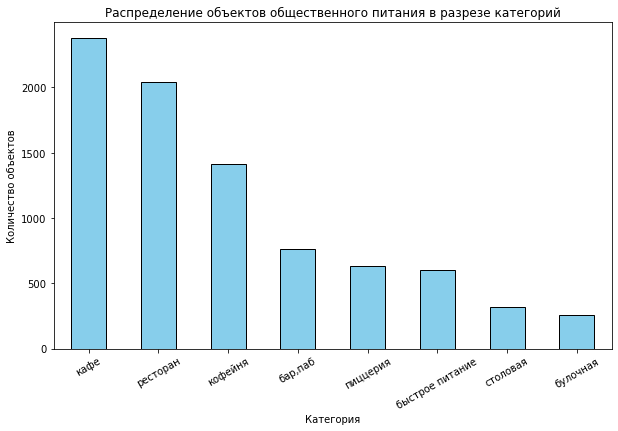

In [26]:
# Для наглядности построим диаграмму распределения

plt.figure(figsize=(10, 6))

df["category"].value_counts().plot(
    kind="bar",
    rot=30,
    color="skyblue",
    legend=False,
    edgecolor="black",
    title=f"Распределение объектов общественного питания в разрезе категорий",
)

plt.ylabel("Количество объектов")
plt.xlabel("Категория")

plt.show()

В данных представлено `8 категорий заведений`: кафе, ресторан, кофейня, бар/паб, пиццерия, быстрое питание, столовая и булочная. `Наибольшее количество заведений относится к категориям "кафе" (2378) и "ресторан" (2043)`.


**3.2. Исследуем как заведения распределены по районам Москвы, а также распределение заведений в каждой категории в Центральном административном округе Москвы:**

- **Посчитаем какое количество заведений находится в каждом районе Москвы:**

In [27]:
df["district"].value_counts()

Центральный административный округ         2242
Северный административный округ             900
Южный административный округ                892
Северо-Восточный административный округ     891
Западный административный округ             851
Восточный административный округ            798
Юго-Восточный административный округ        714
Юго-Западный административный округ         709
Северо-Западный административный округ      409
Name: district, dtype: int64

In [28]:
df["district"].describe()

count                                   8406
unique                                     9
top       Центральный административный округ
freq                                    2242
Name: district, dtype: object

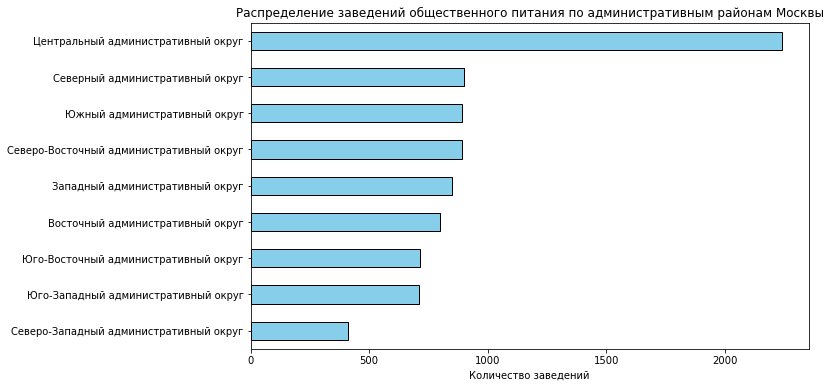

In [29]:
# Для наглядности построим диаграмму распределения

plt.figure(figsize=(10, 6))

df["district"].value_counts(ascending=True).plot(
    kind="barh",
    rot=0,
    color="skyblue",
    legend=False,
    edgecolor="black",
    title=f"Распределение заведений общественного питания по административным районам Москвы",
)

plt.xlabel("Количество заведений")

plt.show()

- **Исследуем распределение заведений каждой категории в Центральном административном округе Москвы:**

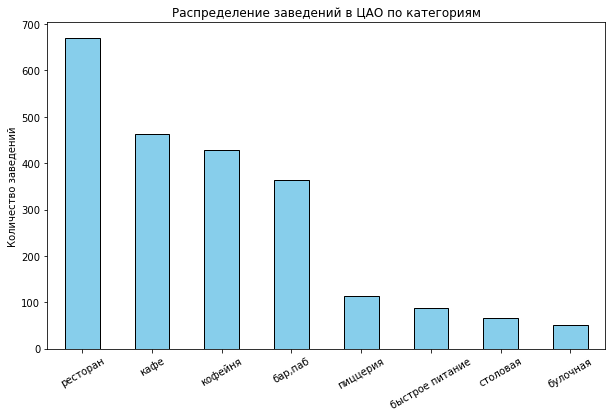

Распределение заведений по категориям в ЦАО:

ресторан           670
кафе               464
кофейня            428
бар,паб            364
пиццерия           113
быстрое питание     87
столовая            66
булочная            50
Name: category, dtype: int64


In [30]:
# Посчитаем количество заведений с группировкой по категориям в ЦАО

cao_df = df[df["district"] == "Центральный административный округ"]

category_counts = cao_df["category"].value_counts()

# Построим гистограмму
plt.figure(figsize=(10, 6))
category_counts.plot(kind="bar", color="skyblue", edgecolor="black", rot=30)


plt.title("Распределение заведений в ЦАО по категориям")
plt.ylabel("Количество заведений")

plt.show()

print("Распределение заведений по категориям в ЦАО:\n")
print(category_counts)

В Москве больше всего заведений в Центральном административном округе (2242), а меньше всего — в Северо-Западном (409). В ЦАО наиболее распространены рестораны (670), кафе (464) и кофейни (428), тогда как столовые (66) и булочные (50) встречаются реже.

**3.3. Изучим соотношение сетевых и несетевых заведений.**

- **Изучим соотношение в целом по всем данным:**

In [31]:
df["chain"].describe()

count      8406
unique        2
top       False
freq       5201
Name: chain, dtype: object

Видим, что `преобладает количество несетевых заведений` (False). Посмотрим на соотношение сетевых инесетевых заведений:

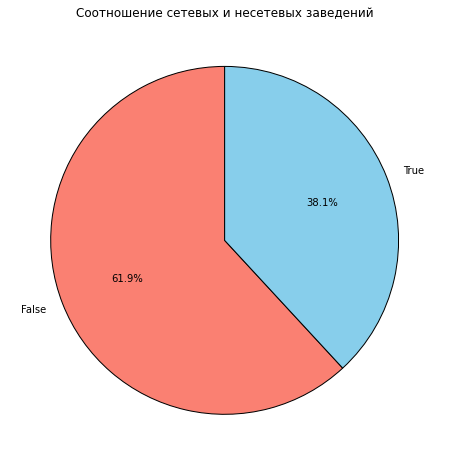

In [32]:
plt.figure(figsize=(10, 8))

df["chain"].value_counts(normalize=True).plot(
    kind="pie",
    colors=["salmon", "skyblue"],
    autopct="%1.1f%%",
    startangle=90,
    wedgeprops={"edgecolor": "black"},
    title="Соотношение сетевых и несетевых заведений",
)

plt.ylabel("")
plt.show()

Диаграмма показывает `преобладание 61.9 % несетевых заведений`.


- **Изучим соотношение сетевых и несетевых заведений в разрезе категорий:**

chain            False  True
category                    
бар,паб           0.78  0.22
булочная          0.39  0.61
быстрое питание   0.62  0.38
кафе              0.67  0.33
кофейня           0.49  0.51
пиццерия          0.48  0.52
ресторан          0.64  0.36
столовая          0.72  0.28


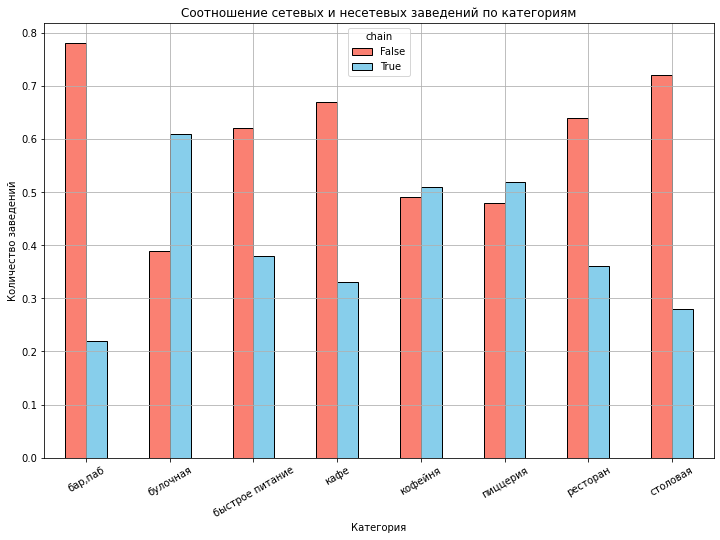

In [33]:
# Подсчитаем количество по категориям и типу заведения (сетевое/несетевое)
df_chain = (
    df.groupby("category")["chain"]
    .value_counts(normalize=True)
    .unstack(fill_value=0)
    .round(2)
)

print(df_chain)

# Строим график
df_chain.plot(
    kind="bar", rot=30, color=["salmon", "skyblue"], edgecolor="black", figsize=(12, 8)
)

plt.title("Соотношение сетевых и несетевых заведений по категориям")
plt.xlabel("Категория")
plt.ylabel("Количество заведений")
plt.grid()


plt.show()

Наибольшая доля сетевых заведений наблюдается среди `пиццерий (56%)` и `кофеен (49%)`.


**3.4. Исследуем заведения по количеству посадочных мест:**


- **Построим гистограмму распределения:**

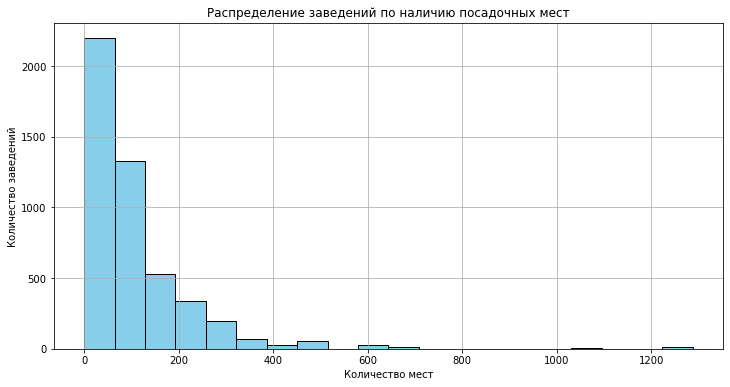

In [34]:
plt.figure(figsize=(12, 6))

df["seats"].plot(kind="hist", bins=20, edgecolor="black", color="skyblue", rot=0)

plt.title("Распределение заведений по наличию посадочных мест")
plt.xlabel("Количество мест")
plt.ylabel("Количество заведений")

plt.grid()

plt.show()

На диаграмме распределения видно, что `большинство заведений имеют количество мест в пределах 100`. Это является нормой для большинства заведений. Также, можно заметить некоторое количество заведений с 400 и 600 местами. Это может свидетельствовать о наличии крупных заведений или сетевых ресторанов с большими залами.  

Однако встречаются аномальные значения, такие как заведения с 1200 местами, что скорее всего является выбросами.  

**Чтобы проверить это выведем статистические данные по столбцу и построим диаграмму размаха:**


In [35]:
df["seats"].describe()

count    4795.000000
mean      108.421689
std       122.833396
min         0.000000
25%        40.000000
50%        75.000000
75%       140.000000
max      1288.000000
Name: seats, dtype: float64

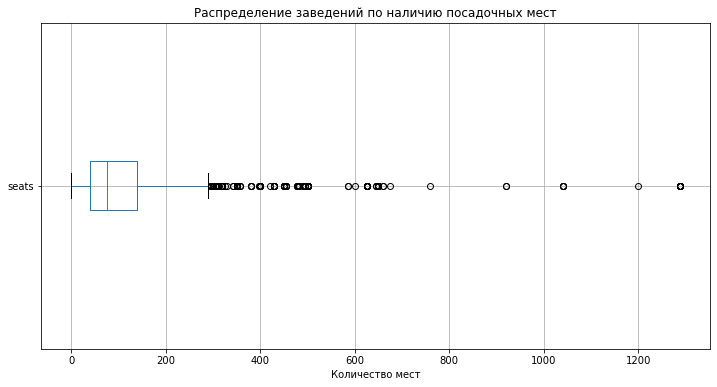

In [36]:
plt.figure(figsize=(12, 6))

df.boxplot(column="seats", vert=False)


plt.title("Распределение заведений по наличию посадочных мест")
plt.xlabel("Количество мест")


plt.show()

Статистически данные показывают, что `половина заведений имеют 80 и менее мест`.
`Стандартное отклонение: 116.36` – довольно большой разброс значений.  

На диаграмме размаха данные распределены неравномерно и имеют асимметрию вправо (правый хвост длиннее). `Основная масса заведений имеет менее 100 мест`, однако есть аномально крупные заведения, значительно превышающие медианные (300+) - вероятно это могут быть крупные рестораны, столовые и банкетные залы. Заведения с 1000+ мест можно считать выбросами так как они значительное отличаются от основной массы.

category
ресторан           86.0
бар,паб            82.5
кофейня            80.0
столовая           75.5
быстрое питание    65.0
кафе               60.0
пиццерия           55.0
булочная           50.0
Name: seats, dtype: Float64


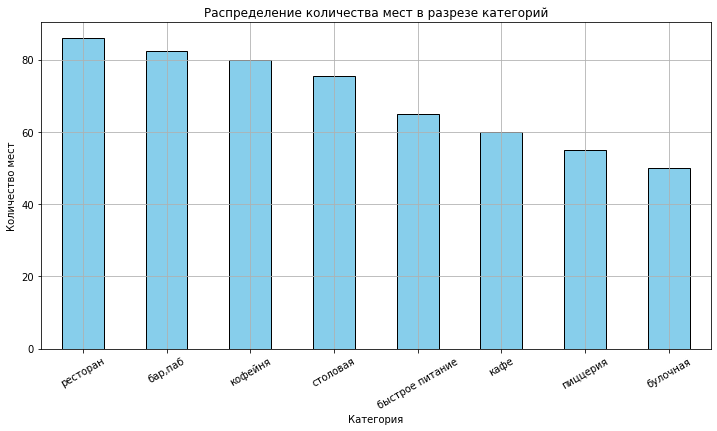

In [37]:
# Сгруппируем количество мест в разрезе категорий
grouped_data = df.groupby("category")["seats"].median().sort_values(ascending=False)

print(grouped_data)


plt.figure(figsize=(12, 6))

grouped_data.plot(kind="bar", color="skyblue", edgecolor="black", rot=30)

plt.xlabel("Категория")
plt.ylabel("Количество мест")
plt.title("Распределение количества мест в разрезе категорий")
plt.grid()

plt.show()

- Категории `Ресторан, Булочная, Бар/Паб` имеют наибольшее среднее количество посадочных мест = `80+`.
- Категории `Кофейня, Столовая, Быстрое питание` - в диапазоне `75-80` посадочных мест.
- Категории `Кафе, Пиццерия` - в среднем имеют `60` посадочных мест.
    


**3.5. Исследуем рейтинг заведений в разрезе категорий:**


In [38]:
# Выведем статистические данные в разрезе категорий

df.groupby("category")["rating"].describe()

,count,mean,std,min,25%,50%,75%,max
category,,,,,,,,
"бар,паб",765.0,4.387712,0.380143,1.1,4.3,4.4,4.6,5.0
булочная,256.0,4.268359,0.386303,1.3,4.2,4.3,4.4,5.0
быстрое питание,603.0,4.050249,0.560949,1.1,3.9,4.2,4.3,5.0
кафе,2378.0,4.123886,0.566081,1.0,4.0,4.2,4.4,5.0
кофейня,1413.0,4.277282,0.372250,1.4,4.1,4.3,4.4,5.0
пиццерия,633.0,4.301264,0.336162,1.0,4.2,4.3,4.4,5.0
ресторан,2043.0,4.290357,0.413046,1.0,4.2,4.3,4.5,5.0
столовая,315.0,4.211429,0.454205,1.0,4.1,4.3,4.4,5.0


category
бар,паб            4.387712
пиццерия           4.301264
ресторан           4.290357
кофейня            4.277282
булочная           4.268359
столовая           4.211429
кафе               4.123886
быстрое питание    4.050249
Name: rating, dtype: float64


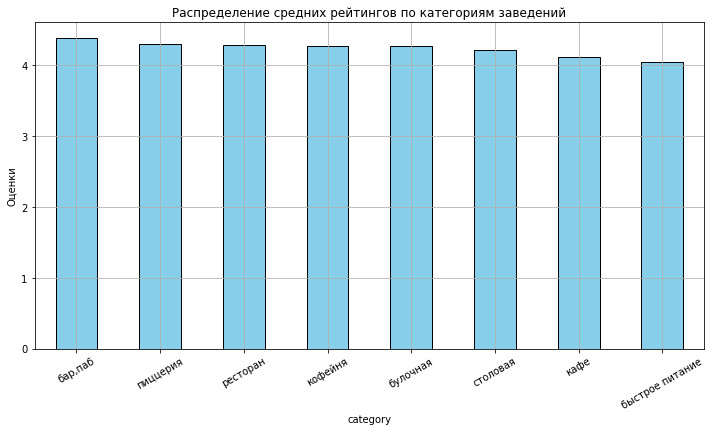

In [39]:
mean_rating = df.groupby("category")["rating"].mean().sort_values(ascending=False)

print(mean_rating)

# Строим график
plt.figure(figsize=(12, 6))
mean_rating.plot(kind="bar", color="skyblue", edgecolor="black", rot=30)


plt.title("Распределение средних рейтингов по категориям заведений")
plt.ylabel("Оценки")

plt.grid()

plt.show()

`Большинство заведений имеют высокие оценки (в районе 4.2–4.5)`, низкие рейтинги встречаются редко. Разница рейтингов в разрезе категорий выражена слабо. Это может говорить либо о хорошем общем уровне заведений, либо о том, что пользователи чаще ставят положительные оценки.  


**3.6. Исследуем как рейтинги заведения коррелируют с различными данными (категория, локация, количемтво мест и т.п.):**

In [40]:
correlation_matrix = df[
    ["category", "district", "chain", "seats", "price", "is_24_7", "rating"]
].phik_matrix()


print("Корреляционная матрица для rating")
correlation_matrix.loc[correlation_matrix.index != "rating"][["rating"]].sort_values(
    by="rating", ascending=False
).round(2)

interval columns not set, guessing: ['seats', 'rating']
Корреляционная матрица для rating


,rating
price,0.22
district,0.20
category,0.19
is_24_7,0.17
chain,0.11
seats,0.00


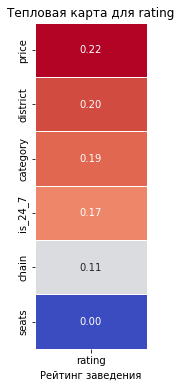

In [41]:
# Построим тепловую карту
plt.figure(figsize=(2, 6))

data_heatmap = correlation_matrix.loc[correlation_matrix.index != "rating"][
    ["rating"]
].sort_values(by="rating", ascending=False)
sns.heatmap(
    data_heatmap,
    annot=True,
    fmt=".2f",  # отразим данные с двумя знаками после запятой
    cmap="coolwarm",
    linewidths=0.5,
    cbar=False,
)

plt.title("Тепловая карта для rating")
plt.xlabel("Рейтинг заведения")


plt.show()

Наибольшая корреляция наблюдается с ценовой категорией `price` (0.22). Так же наблюдается высокая корреляция рейтинга с районом `district` (0.20) и категорией заведедения `category` (0.19). Для остальных признаков коэффициент корреляции снижается с 0.17 до 0.  

- **Изучим зависимость рейтинга от ценовой категории:**

In [42]:
# Посчитаем коэффициент корреляции по Спирмену
corr = df["price"].corr(df["rating"], method="spearman")
print(f"Корреляция между ценовой категорией и рейтингом: {corr:.2f}")

Корреляция между ценовой категорией и рейтингом: -0.23


`Корреляция -0.23` говорит о слабой отрицательной связи. Это означает, что с повышением ценовой категории рейтинг немного снижается, но эта связь назначтильна.

**3.7. Исследуем топ-15 самых популярных заведений Москвы:**


- **Составим топ-15 по количеству заведений:**

In [43]:
pivot = (
    pd.pivot_table(
        df,
        index=["name", "category"],
        values=["id", "rating"],
        aggfunc={
            "id": "count",
            "rating": "mean",
        },  # считаем количество заведений и средний рейтинг
    )
    .round(2)
    .rename(columns={"id": "count", "rating": "avg_rating"})  # Переименовываем столбцы
    .sort_values(by="count", ascending=False)
    .head(15)  # Выводим топ-15
)

pivot

,,count,avg_rating
name,category,,
КАФЕ,кафе,159,3.85
ШОКОЛАДНИЦА,кофейня,119,4.18
ДОМИНО'С ПИЦЦА,пиццерия,77,4.17
ДОДО ПИЦЦА,пиццерия,74,4.29
ONE PRICE COFFEE,кофейня,72,4.07
ЯНДЕКС ЛАВКА,ресторан,69,3.87
COFIX,кофейня,65,4.08
PRIME,ресторан,49,4.11
КОФЕПОРТ,кофейня,42,4.15


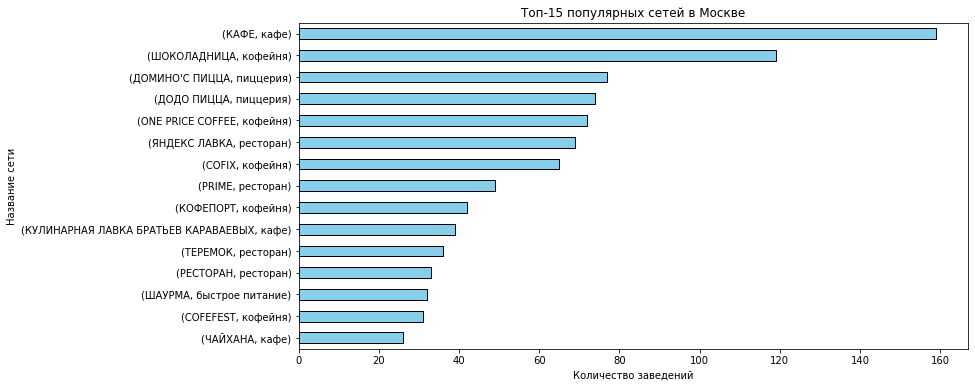

In [44]:
pivot = pivot.sort_values(by="count", ascending=True)


plt.figure(figsize=(12, 6))

pivot["count"].plot(kind="barh", color="skyblue", edgecolor="black", rot=0)


plt.xlabel("Количество заведений")
plt.ylabel("Название сети")
plt.title("Топ-15 популярных сетей в Москве")
plt.show()

Наиболее популярной сетью по количеству заведений является сеть `"КАФЕ" (159 заведений)` в категории "кафе". Возможно, это связано с ошибками в данных, так как название сети слишком общее.
Второй по популярности является сеть кофеен `"ШОКОЛАДНИЦА" (119 заведений)`, относящаяся к категории "кофейни".
На третьем месте находится сеть `"ДОМИНО'С ПИЦЦА" (77 заведений)` в категории "пиццерии".

- **Изучим рейтинг для топ-15 самых популярных заведений Москвы:**

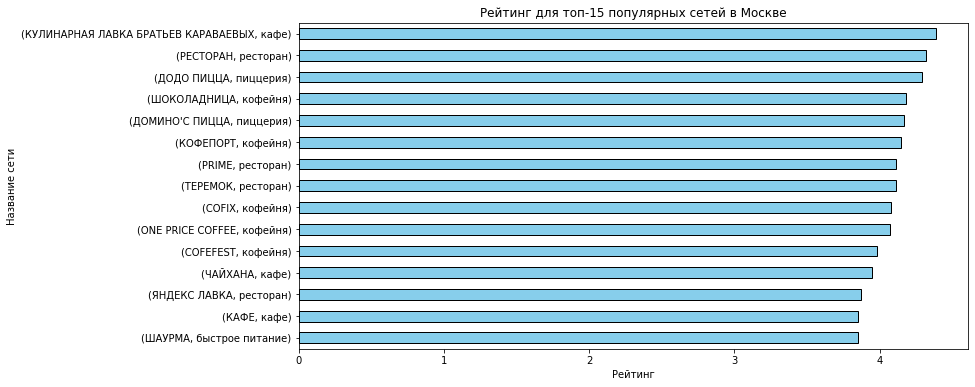

In [45]:
plt.figure(figsize=(12, 6))

pivot["avg_rating"].sort_values(ascending=True).plot(
    kind="barh", color="skyblue", edgecolor="black", rot=0
)

plt.xlabel("Рейтинг")
plt.ylabel("Название сети")
plt.title("Рейтинг для топ-15 популярных сетей в Москве")
plt.show()

Наивысший рейтинг имеет сеть кафе КУЛИНАРНАЯ ЛАВКА БРАТЬЕВ КАРАВАЕВЫХ (`4.39`). Рейтинг остальных сетей находится в диапазоне от `3.85` до `4.32`, что говорит о том, что большинство популярных сетей в Москве имеют относительно высокий средний рейтинг.

Основная часть сетей с высоким рейтингом относится к категории кофейни (например, "ШОКОЛАДНИЦА", "КОФЕПОРТ"), а также кафе и рестораны.

**3.8. Анализируем, как размер среднего чека варьируется в зависимости от района Москвы:**

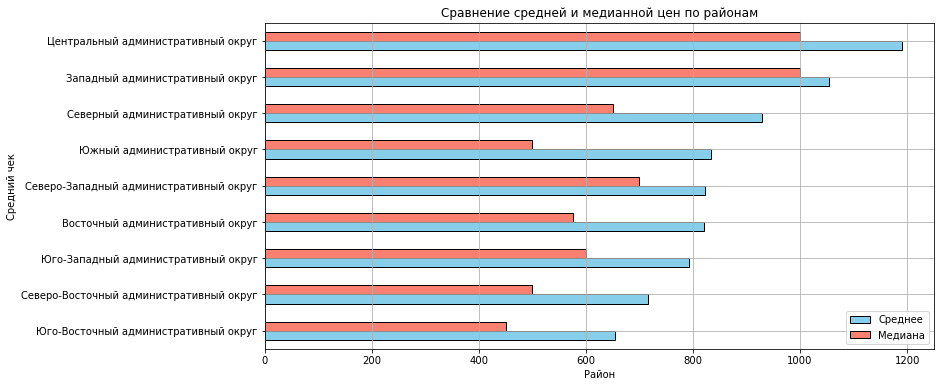

In [46]:
import matplotlib.pyplot as plt

# Группируем по району и вычисляем средние и медианные цены по районам
grouped_mean = df.groupby("district")["middle_avg_bill"].mean().round(2)
grouped_median = df.groupby("district")["middle_avg_bill"].median().round(2)

# Создаем DataFrame, чтобы отобразить их на одном графике
grouped_dataframe = pd.DataFrame({"Среднее": grouped_mean, "Медиана": grouped_median})

# Сортируем по среднему чеку
grouped_dataframe = grouped_dataframe.sort_values(by="Среднее", ascending=True)

# Строим график
grouped_dataframe.plot(
    kind="barh",
    figsize=(12, 6),
    color=["skyblue", "salmon"],
    edgecolor="black",
    legend=True,
)

plt.xlabel("Район")
plt.ylabel("Средний чек")
plt.title("Сравнение средней и медианной цен по районам")
plt.grid(True)
plt.show()

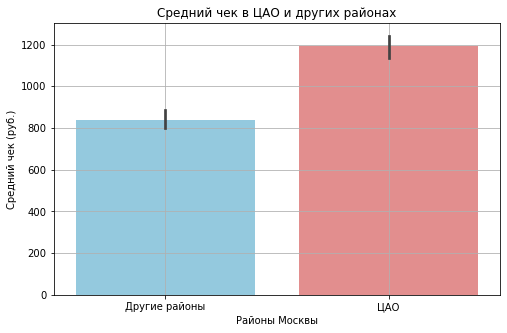

Средний чек в ЦАО: 1191.06 руб.
Средний чек в других районах: 839.82 руб.
Разница: 351.23 руб.


In [47]:
# Выделяем данные для ЦАО и других районов
df["is_CAO"] = df["district"] == "Центральный административный округ"

# Считаем средний чек по ЦАО и остальным районам
avg_bill_cao = df[df["is_CAO"] == 1]["middle_avg_bill"].mean()
avg_bill_other = df[df["is_CAO"] == 0]["middle_avg_bill"].mean()

# Вычисляем разницу
difference = avg_bill_cao - avg_bill_other

# Строим график сравнения цен в ЦАО с ценами в других районах
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x="is_CAO", y="middle_avg_bill", palette=["skyblue", "lightcoral"])
plt.xticks([0, 1], ["Другие районы", "ЦАО"])
plt.title("Средний чек в ЦАО и других районах")
plt.xlabel("Районы Москвы")
plt.ylabel("Средний чек (руб.)")
plt.grid()
plt.show()


print(f"Средний чек в ЦАО: {avg_bill_cao:.2f} руб.")
print(f"Средний чек в других районах: {avg_bill_other:.2f} руб.")
print(f"Разница: {difference:.2f} руб.")

Средний чек в заведениях ЦАО выше, чем в остальных районах Москвы, в среднем на 350 рублей. Более высокие цены в центре можно объяснить высоким спросом, хорошей транспортной доступностью и высокими затратами на аренду.
Цены в других районах могут быть ниже из-за меньшей концентрации посетителей, разных уровней доходов, более дешевой арендой.

## 4. Итоговый вывод и рекомендации


В рамках исследования проанализированы данные о `8406` заведениях общественного питания Москвы. Анализ охватывает категории заведений, их расположение, рейтинги, ценовую политику и сетевое/несетевое распределение. 

### Ключевые выводы:

- **Категории заведений:** в данных представлено 8 категорий заведений: кафе, ресторан, кофейня, бар/паб, пиццерия, быстрое питание, столовая и булочная. Наибольшее количество заведений относится к категориям кафе (2378) и рестораны (2043). Это означает высокую конкуренцию в этих категориях, особенно в центральных районах. При выборе концепции нового заведения стоит это учитывать.

- **Сетевое и несетевое распределение:** 61.9% заведений — несетевые, однако среди пиццерий (56%) и кофеен (49%) сетевые заведения встречаются чаще. Это говорит о том, что для этих категорий сетевой формат может быть более эффективным.

- **Рейтинг и качество:** средний рейтинг заведений варьируется от 4.2 до 4.5. Бары/пабы (4.38), рестораны (4.30) и пиццерии (4.29) имеют самые высокие оценки, в то время как заведения быстрого питания (4.05) — самые низкие.  
Среди сетевых заведений наивысший рейтинг имеет сеть кафе "КУЛИНАРНАЯ ЛАВКА БРАТЬЕВ КАРАВАЕВЫХ" (4.39). Большинство популярных сетей в Москве имеют относительно высокий рейтинг (от 3.85 до 4.32), особенно сети кофеен ("ШОКОЛАДНИЦА", "КОФЕПОРТ"), кафе и ресторанов. Это подтверждает важность качества сервиса и репутации сети.

- **Ценовая политика и расположение:** средний чек в Центральном административном округе (1191 руб.) выше, чем в остальных районах в среднем на 351 руб. Это может объясняться более дорогой арендой в центре города, более высоким уровнем заведений и высокой платежеспособностью посетителей.


### Рекомендации:

- **Определение концепции заведения:** рынок кафе и ресторанов уже насыщен, и конкуренция в этих категориях высока. Если цель — выйти на более дорогой сегмент с высокой конкуренцией, ресторан будет хорошим выбором. Если же задача — выбрать менее насыщенную нишу, стоит обратить внимание на кофейни или столовые.

- **Выбор формата заведения:** для быстрого масштабирования и роста лучше рассматривать сетевые форматы, особенно для пиццерий и кофеен. В то же время, если концепция ориентирована на индивидуальность, можно сосредоточиться на несетевых заведениях.

- **Расположение заведения:** ЦАО идеально подходит для высокого ценового сегмента и премиального сервиса. Для более доступной ценовой категории, с большим объемом посетителей, стоит выбирать районы, удалённые от центра.

- **Рейтинг и качество обслуживания:** прежде чем открывать заведение, стоит обеспечить высокий уровень качества обслуживания и продуктов. Рестораны и бары/пабы показывают наивысшие рейтинги, а среди сетевых заведений лучшие оценки у "КУЛИНАРНОЙ ЛАВКИ БРАТЬЕВ КАРАВАЕВЫХ" (4.39). Внимание к этим аспектам поможет создать хорошую репутацию с самого начала.

**Заключение:** при открытии нового заведения в Москве рекомендуется ориентироваться на концепцию кафе или ресторана. Эти категории популярны, но и конкуренция в них высокая. Поэтому важно выделяться качественным обслуживанием и уникальной концепцией.

Для успешного старта целесообразно выбрать центральные районы города, где есть потенциал для установки более высокого среднего чека и высокая проходимость. При этом стоит учитывать высокие арендные ставки в этих районах. Важно тщательно продумать бизнес-модель, чтобы высокий уровень аренды компенсировался за счет большего потока клиентов и более высоких цен.


